# Projeto de análise exploratória de dados para área de varejo, pela Data Science Academy

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sea
import datetime as dt
from pandas import DataFrame

In [3]:
df_dsa = pd.read_csv('dataset.csv')

In [4]:
df_dsa.shape

(9700, 11)

In [5]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [7]:
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


# Pergunta 1
QUAL A CIDADE COM MAIOR VALOR VENDA DE PRODUTOS DA CATEGORIA 'OFFICE SUPPLIES?

In [13]:
df_dsa1=df_dsa[df_dsa['Categoria']=='Office Supplies']
df_dsa1[['Categoria','Cidade','Valor_Venda']].groupby(['Categoria','Cidade']).sum().reset_index().sort_values(by='Valor_Venda', ascending = False)

,Categoria,Cidade,Valor_Venda
295,Office Supplies,New York City,68362.814
239,Office Supplies,Los Angeles,47098.100
392,Office Supplies,San Francisco,41771.198
406,Office Supplies,Seattle,34856.878
335,Office Supplies,Philadelphia,29313.687
...,...,...,...
316,Office Supplies,Ormond Beach,2.808
331,Office Supplies,Pensacola,2.214
202,Office Supplies,Jupiter,2.064
129,Office Supplies,Elyria,1.824


In [14]:
#Pergunta: QUAL A CIDADE COM MAIOR VALOR VENDA DE PRODUTOS DA CATEGORIA 'OFFICE SUPPLIES?
#NYC
df_dsa_p1=df_dsa[df_dsa['Categoria']=='Office Supplies']
df_dsa_p1_total=df_dsa_p1.groupby('Cidade')['Valor_Venda'].sum()
cidade_maior_venda=df_dsa_p1_total.idxmax()
print('cidade com maior valor venda para office supplies:',cidade_maior_venda)

cidade com maior valor venda para office supplies: New York City


# Pergunta 2
QUAL O TOTAL DE VENDAS POR DATA DO PEDIDO?

<Axes: >

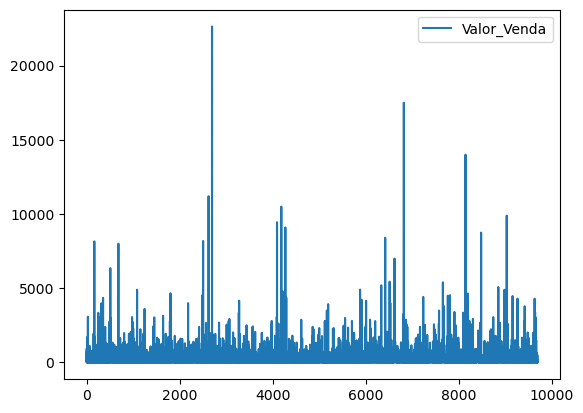

In [15]:
df_dsa.plot()

In [16]:
df2=df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

In [17]:
df2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

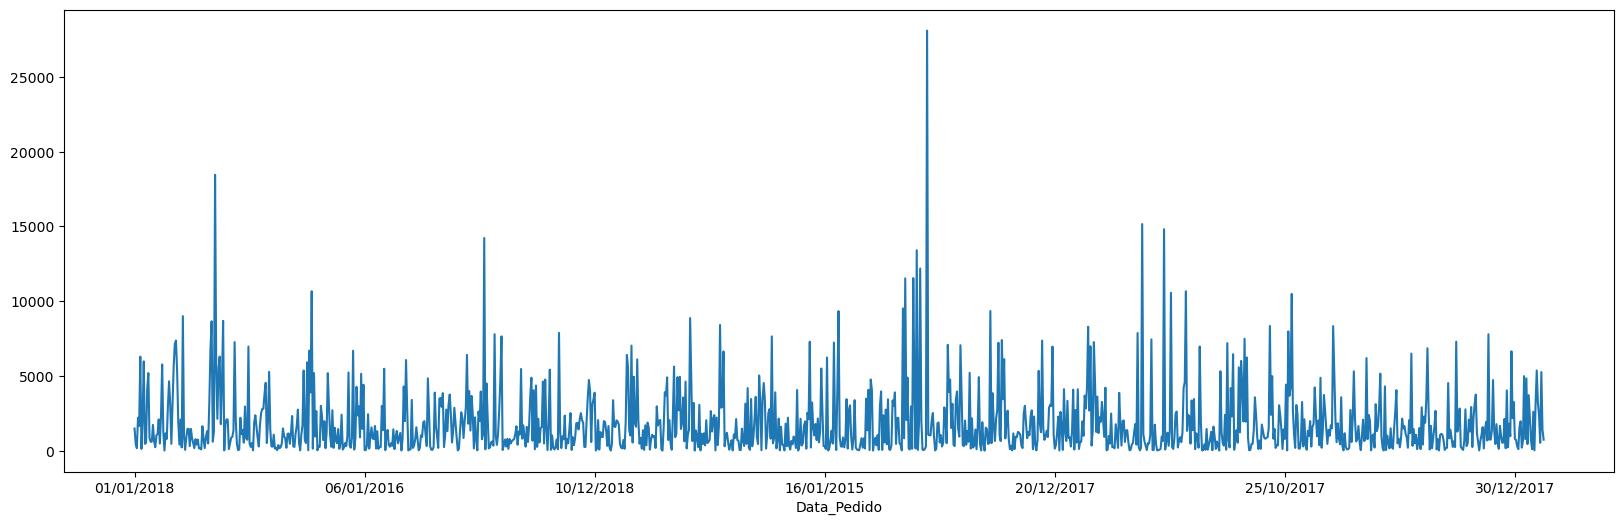

In [18]:
plt.figure(figsize=(20,6))
df2.plot(x='Data_Pedido',y='Valor_Venda')
plt.show()

# Pergunta 3
TOTAL DE VENDAS POR ESTADO?

In [19]:
df3=df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()
df3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


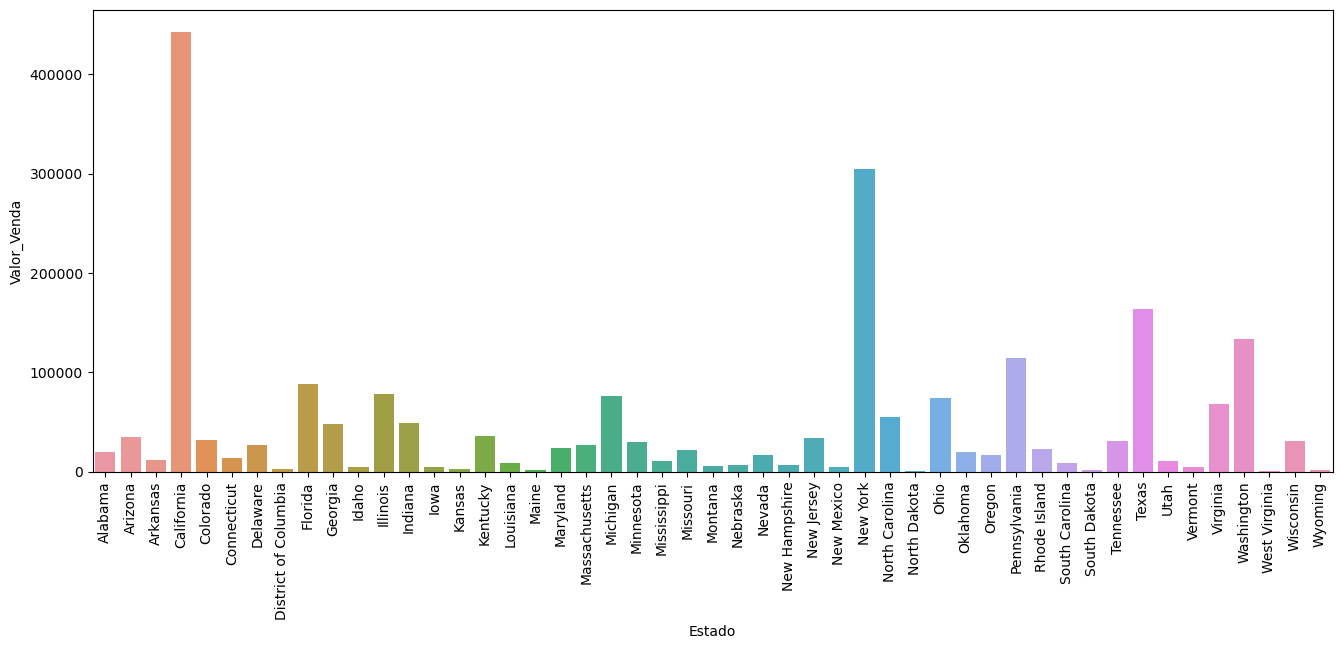

In [20]:
plt.figure(figsize=(16,6))
sea.barplot(data=df3,
           y='Valor_Venda',
           x='Estado')
plt.xticks(rotation=90)
plt.show()

# Pergunta 4
QUAIS SÃO AS 10 CIDADES COM MAIOR TOTAL DE VENDAS?

In [21]:
df4=df_dsa.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',
                                                                           ascending=False).head(10)

In [22]:
df4.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


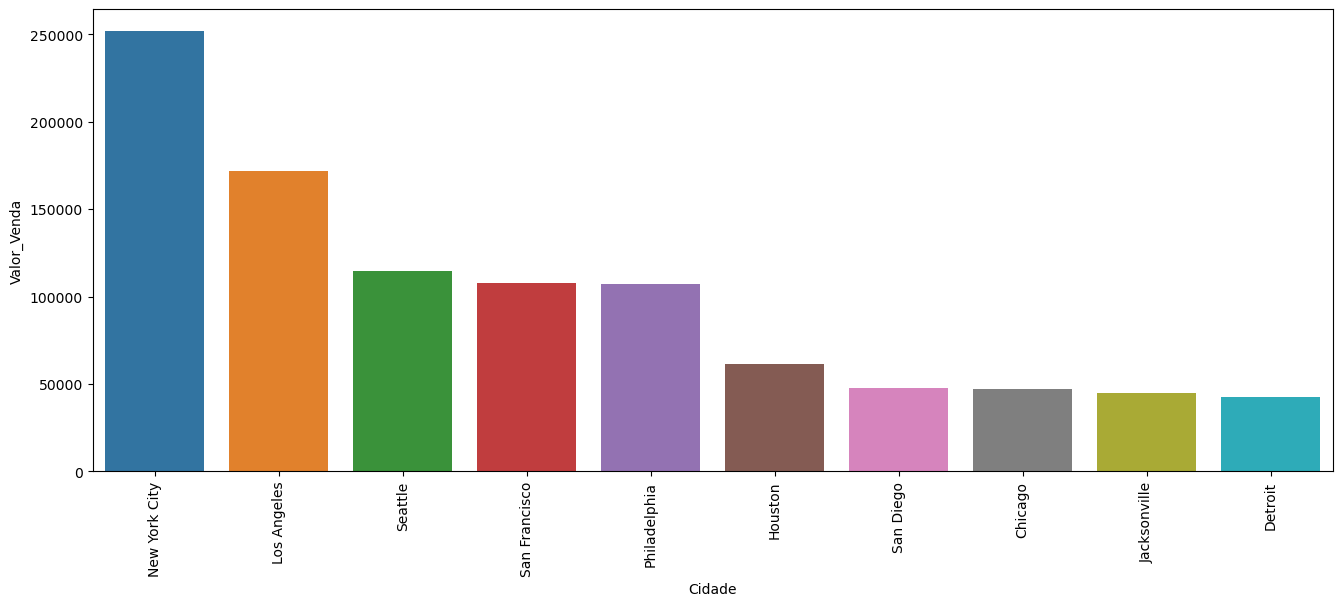

In [23]:
plt.figure(figsize=(16,6))
sea.barplot(data=df4,
           y='Valor_Venda',
           x='Cidade')
plt.xticks(rotation=90)
plt.show()

# Pergunta 5
QUAL SEGMENTO TEVE O MAIOR TOTAL DE VENDAS?

In [24]:
df5=df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',
                                                                             ascending=False)
df5.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [25]:
def autopct_format(values):
    def my_format(pct):
        total=sum(values)
        val=int(round(pct*total/100.0))
        return '$ {v:d}'.format(v=val)
    return my_format

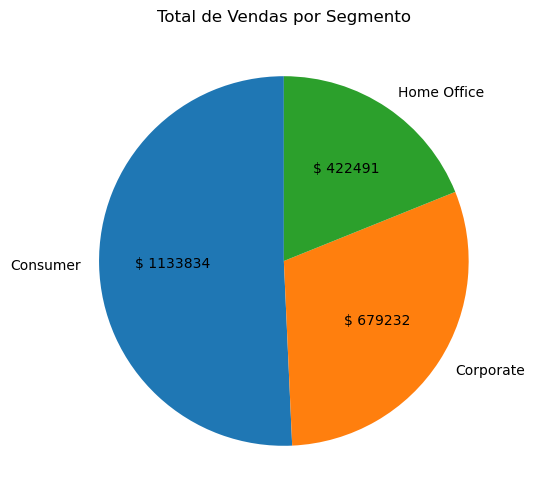

In [26]:
plt.figure(figsize=(16,6))
plt.pie(df5['Valor_Venda'],
       labels=df5['Segmento'],
       autopct=autopct_format(df5['Valor_Venda']),
        startangle=90)
plt.title('Total de Vendas por Segmento')
plt.show()

# Pergunta 6
Qual o Total de Vendas Por Segmento e Por Ano?

In [27]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [28]:
df6=df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()
df6.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [29]:
df61=df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()
df61.head()

,Data_Pedido,Valor_Venda
0,01/01/2018,1481.8280
1,01/02/2015,468.9000
2,01/02/2017,161.9700
3,01/03/2015,2203.1510
4,01/03/2016,1642.1744


In [30]:
df_dsa['Data_Pedido']=pd.to_datetime(df_dsa['Data_Pedido'],dayfirst=True)
df_dsa['ano']=df_dsa['Data_Pedido'].dt.year
#acima foi criada a coluna 'ano' na tabela 
df6=df_dsa.groupby(['ano','Segmento'])['Valor_Venda'].sum().reset_index()
df6.head()

,ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229


# Pergunta 7
Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:Se o Valor_Venda for maior que 1000 recebe 15% de desconto.Se o Valor_Venda for menor que 1000 recebe 10% de desconto.Quantas Vendas Receberiam 15% de Desconto?

In [31]:
df_dsa[df_dsa['Valor_Venda']<1000]
#9243 vendas receberiam 10% de desconto

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017


In [32]:
df_dsa[df_dsa['Valor_Venda']>1000]
#457 vendas receberiam 15% de desconto

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017


In [33]:
df_dsa['Desconto']=np.where(df_dsa['Valor_Venda']>1000,0.15,0.10)
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [34]:
df_dsa['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

# Pergunta 8
Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [35]:
df_dsa['Valor_Desconto']=df_dsa['Valor_Venda']-(df_dsa['Valor_Venda']*df_dsa['Desconto'])
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,ano,Desconto,Valor_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [36]:
df_dsa8antes=df_dsa.loc[df_dsa['Desconto']==0.15, 'Valor_Venda']
df_dsa8depois=df_dsa.loc[df_dsa['Desconto']==0.15, 'Valor_Desconto']

In [37]:
df_dsa8antes.mean()

2116.8078153172864

In [38]:
df_dsa8depois.mean()

1799.2866430196934

# Pergunta 9
Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha

In [39]:
df_dsa['Data_Pedido']=pd.to_datetime(df_dsa['Data_Pedido'],dayfirst=True)
df_dsa['mes']=df_dsa['Data_Pedido'].dt.month

In [40]:
df9=df_dsa.groupby(['ano','Segmento','mes'])['Valor_Venda'].agg([np.sum,np.mean,np.median])
df9

sum        mean  median
ano  Segmento    mes                               
2015 Consumer    1     6896.629  146.736787  36.440
                 2     3167.854  117.327926  22.776
                 3    11869.304  152.170564  49.172
                 4     9108.612  189.762750  49.875
                 5    12628.271  191.337439  56.910
...                         ...         ...     ...
2018 Home Office 8     5813.300  176.160606  71.980
                 9    19183.826  249.140597  63.686
                 10   29705.515  412.576597  48.075
                 11   24009.384  247.519423  56.560
                 12   13022.391  224.523983  49.260

[144 rows x 3 columns]

In [41]:
anos=df9.index.get_level_values(0)
segmentos=df9.index.get_level_values(1)
meses=df9.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

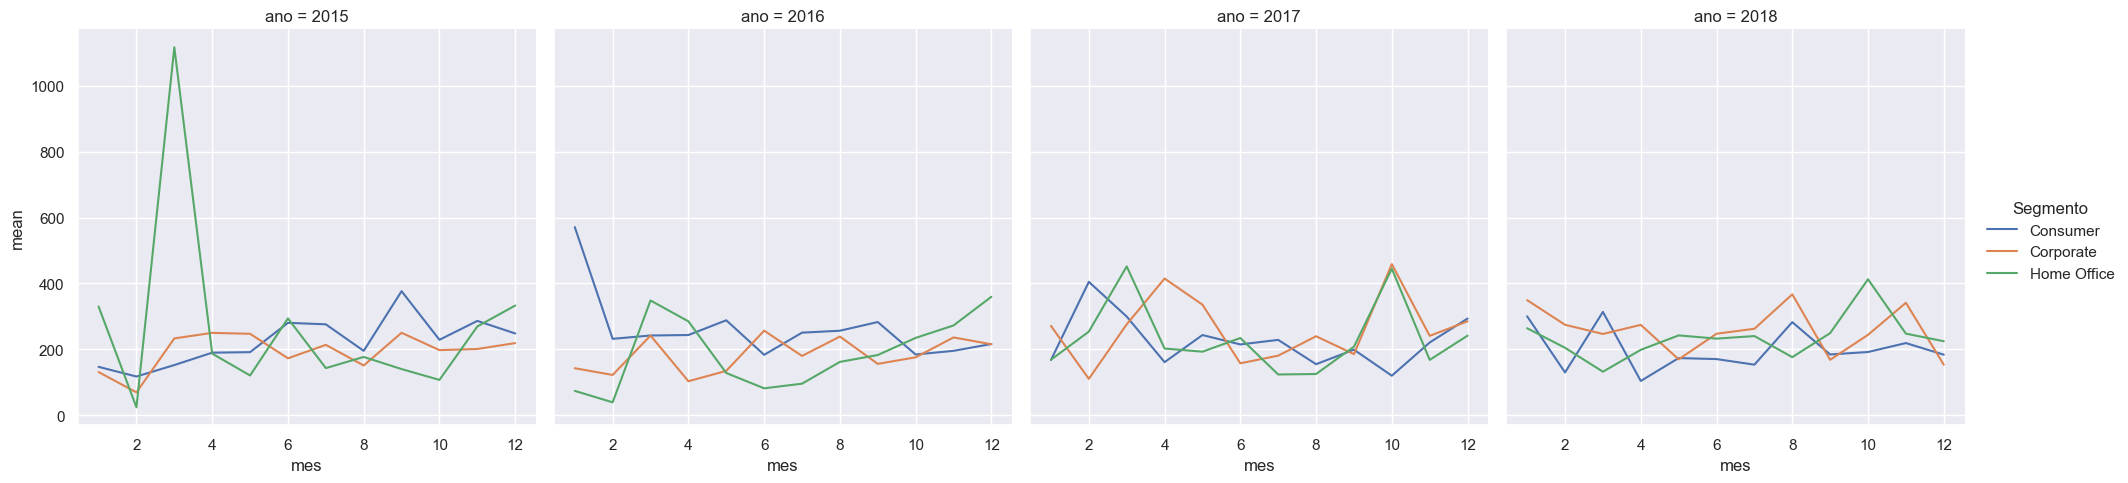

In [42]:
plt.figure(figsize=(12,6))
sea.set()
fig1=sea.relplot(kind='line',
                data=df9,
                y='mean',
                x=meses,
                hue=segmentos,
                col=anos,
                col_wrap=4)
plt.show()

# Pergunta 10
Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico

In [43]:
df10=df_dsa.groupby(['Categoria',
                     'SubCategoria']).sum(numeric_only=True).sort_values('Valor_Venda',
                                                                         ascending=False).head(12)

In [44]:
df10=df10[['Valor_Venda']].astype(int).sort_values(by='Categoria').reset_index()
df10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [45]:
df10cat=df10.groupby('Categoria').sum(numeric_only=True).reset_index()
df10cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [46]:
corescat=['#4287f5',
         '#6cf542',
         '#f542e0']
coresub=['#aa8cd4',
        '#4287f5',
        '#456496',
        '#459647',
        '#449648',
        '#439649',
        '#964582',
        '#954583']

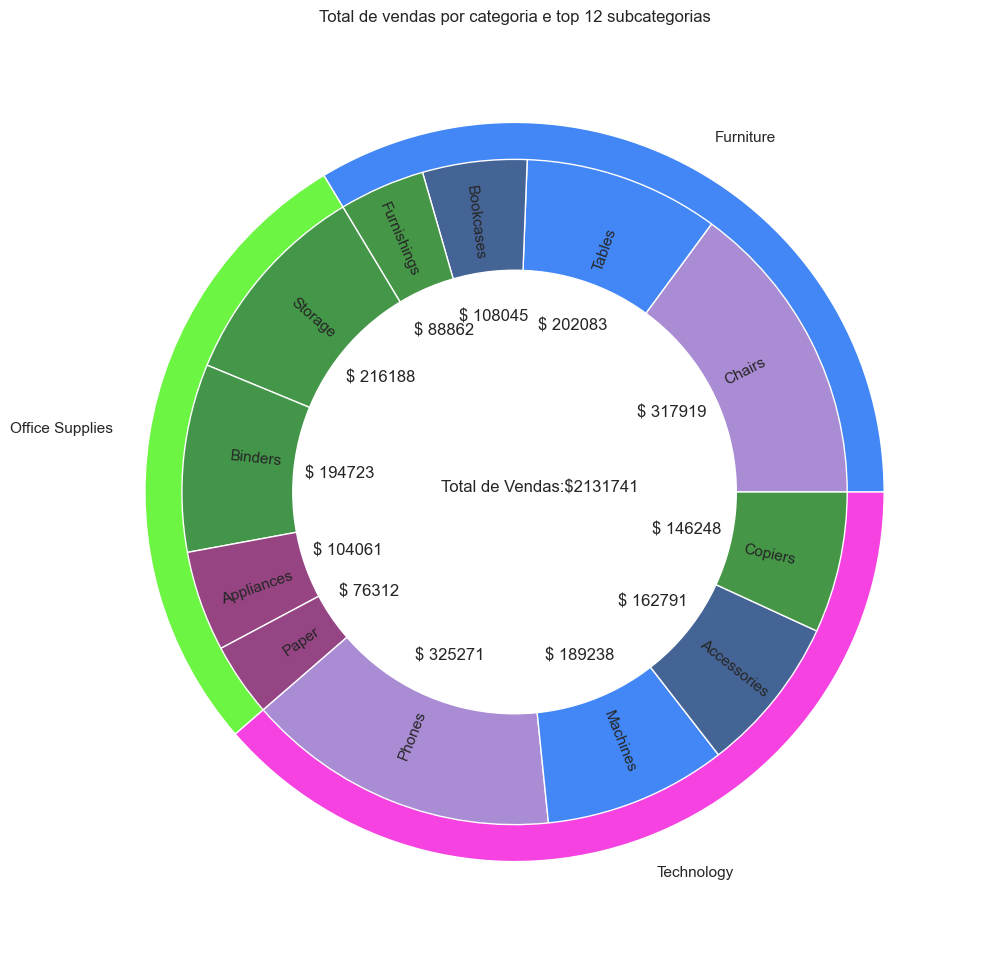

In [48]:
fig,ax=plt.subplots(figsize=(18,12))
p1=ax.pie(df10cat['Valor_Venda'],
         radius=1,
         labels=df10cat['Categoria'],
         wedgeprops=dict(edgecolor='white'),
         colors=corescat)
p2=ax.pie(df10['Valor_Venda'],
          radius=0.9,
          labels=df10['SubCategoria'],
          autopct=autopct_format(df10['Valor_Venda']),
          colors=coresub,
          labeldistance=0.7,
          wedgeprops=dict(edgecolor='white'),
          pctdistance=0.53,
          rotatelabels=True)
centre_circle=plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text='Total de Vendas:'+'$'+str(int(sum(df10['Valor_Venda']))),xy=(-0.2,0))
plt.title('Total de vendas por categoria e top 12 subcategorias')
plt.show()